<a href="https://colab.research.google.com/github/FatimaHabib/Image-classifier/blob/main/Hair_types_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install bing image library 
!pip install bing-image-downloader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# make directory tot save images 
!mkdir images 

In [ ]:
# count the number of files in a directory 
import os
dir = "RandomDirectory"
def count_files(dir):
   """This function count the number of files in a directory. Input: folder directory. """
   count_files = 0
   for path in os.listdir(dir):
        if os.path.isfile(os.path.join(dir, path)):
            count_files += 1
   return count_files

In [ ]:
#import bing image library
from bing_image_downloader import downloader
downloader.download("curly hair", limit = 500, output_dir = "/content/drive/MyDrive/images") 

ModuleNotFoundError: ignored

# 1. Setup and load data

## 1.1 Install dependencis and setup

In [ ]:
## import required libraries 
import tensorflow as tf 
import os 
from  matplotlib  import pyplot as plt

In [ ]:
## Avoid OOM  errors by setting GPU Memory COnsumption Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
  
 

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## 1.2 Remove doggy images 

In [ ]:
import cv2
import imghdr # check the file extintion for a particular image 


In [ ]:
# create a variable that holds the data directory
data_dir = "/content/drive/MyDrive/images"

In [ ]:
# image extentions 
img_exts = ['jpeg','jpg','bmp','png']

In [ ]:
# read a single image 
img = cv2.imread(os.path.join("/content/drive/MyDrive/images", "curly_hair", "image_105.jpg"))
print("Shape of the image", img.shape)

Shape of the image (633, 496, 3)


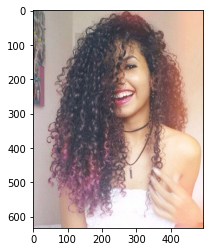

In [ ]:

## Show the image  
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
## preprocessing 
for image_class in os.listdir(data_dir): ## loop over the folders in images folder
    for image in os.listdir(os.path.join(data_dir, image_class)):     ## loop over the files 
        image_path = os.path.join(data_dir, image_class, image)
        try:
          img = cv2.imread(image_path) ## open an image, this line to check if it is a valide image
          tip = imghdr.what(image_path) ## check the imgage extention
          if tip not in img_exts:
            print("Image {} is not in ext list".format(image_path))
            os.remove(image_path)
        except Exception as e:
          print('Issue with image  {}'.format(image_path))
          #os.remove(image_path)


In [ ]:
## count the number of images in each folder 
print("There are {} straight hair photos.".format(count_files("/content/drive/MyDrive/images/straight_hair")))
print("There are {} curly hair photos.".format(count_files("/content/drive/MyDrive/images/curly_hair")))
print("There are {} wavy hair photos.".format(count_files("/content/drive/MyDrive/images/wavy_hair")))


There are 231 straight hair photos.
There are 205 curly hair photos.
There are 204 wavy hair photos.


## 1.3 Load Dataset 

In [ ]:
## ?? return the dcumentaion
import numpy as np


In [ ]:
#tf.keras.utils.image_dataset_from_directory?? ## look at the parameters you can change them. ex: change the batch size 32 > 16

In [ ]:
## check the image classes
for image_class in os.listdir(data_dir):
  print(image_class)

curly_hair
wavy_hair
straight_hair


In [ ]:
## load dataset  from the images directory
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/images') ## build a dataset in the fly no need to build labels or classes, resize images

Found 640 files belonging to 3 classes.


In [ ]:
## loop through data batches
data_iterator = data.as_numpy_iterator()

In [ ]:
# get a batch
batch = data_iterator.next()

In [ ]:
# the length of the batch is 2 (images, labels)
len(batch)

2

In [ ]:
# imaages represented as a numpy array
# class 0 = curly, class 1 = straight, class 2 = wavy 
batch[0].shape # 32 images of size 256 * 256 , 3 channels 

(32, 256, 256, 3)

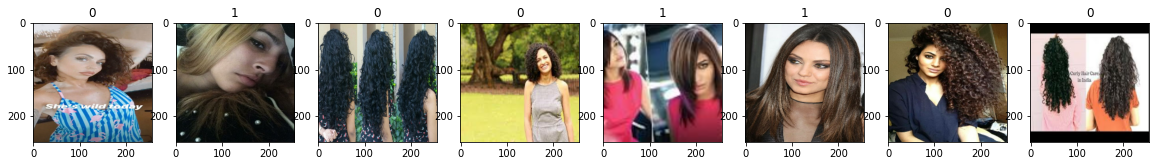

In [ ]:
fig, ax = plt.subplots(ncols = 8, figsize = (20,20))
for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# 2. Preprocessing Data

## 2.1 Scale Data

In [ ]:
##rescale the images 
data = data.map(lambda x, y: (x/255.,y))

In [ ]:
## get a batch
scaled_iterator = data.as_numpy_iterator()

In [ ]:
# get a batch
batch = scaled_iterator.next()

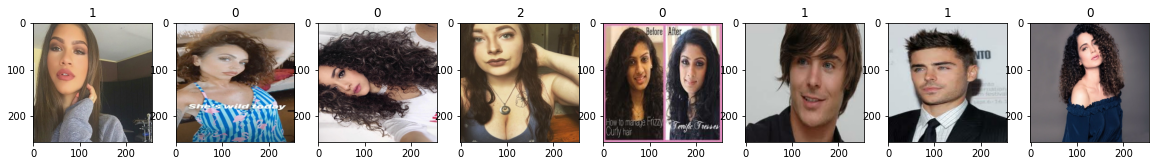

In [ ]:
fig, ax = plt.subplots(ncols = 8, figsize = (20,20))
for idx, img in enumerate(batch[0][:8]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# after the scaling 
batch[0].max()

1.0

 ## 2.2  split Data

In [ ]:
## number of batches 
print("There is {} batches, the batch size is {}".format(len(data), batch[0].shape))

There is 20 batches, the batch size is (32, 256, 256, 3)


In [ ]:
  ## train, test and validation 
train_size = int(len(data)*.7)
test_size = int(len(data)*.2) 
val_size = int(len(data)*.1) # validation while training e



In [ ]:
len(data)

20

In [ ]:
test_size + train_size +val_size

20

In [ ]:
## partitioning the dataset , loading data ####
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [ ]:
#
len(train)
len(val)

2

In [ ]:
classes = ["curly", "straight","wavy"]

2
1
2
0
0
2
0
1
0


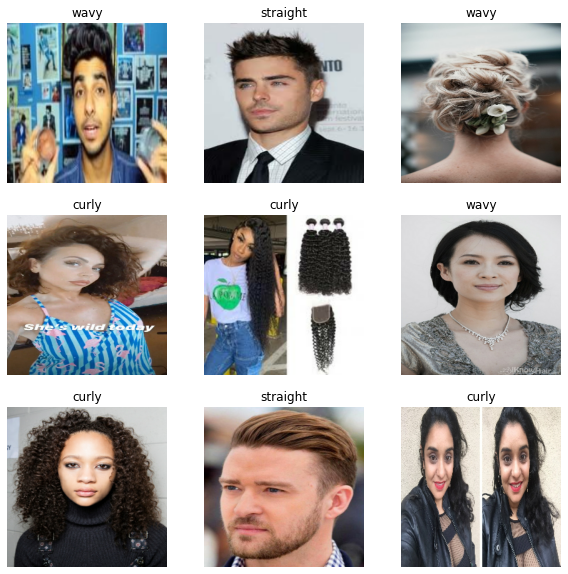

In [ ]:


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    print(labels[i].numpy())
    ax = plt.subplot(3, 3, i + 1)
    
    plt.imshow((images[i].numpy()*255).astype("uint8"))
    plt.title(classes[labels[i].numpy()])
    plt.axis("off")

# 3. Build the Deep Learning Model

## 3.1 Build Deep Learning Model 

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [ ]:
# add layers to the sequential model

# initialize a sequential model
model = Sequential()
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape = (256,  256, 3))) # 16 filters, stride of 1 pixel (move 1 pixel)
model.add(MaxPooling2D()) ## deafault size  2*2

model.add(Conv2D(32,(3,3),1, activation = 'relu')) # 16 filters, stride of 1 pixel (move 1 pixel)
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu')) # 16 filters, stride of 1 pixel (move 1 pixel)
model.add(MaxPooling2D())



model.add(Flatten())

model.add(Dense(256, activation ='relu'))
model.add(Dense(3, activation ='softmax')) ## softmax



In [ ]:
model.compile('adam', loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])  ## cross entropy loss for multi class calssifictaion 


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train 


In [ ]:
logdir = 'logs'    

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit (train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback] )

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 21s 517ms/step - loss: 1.2370 - accuracy: 0.3616 - val_loss: 1.0927 - val_accuracy: 0.3281
Epoch 2/20
14/14 [==============================] - 9s 551ms/step - loss: 1.0786 - accuracy: 0.4487 - val_loss: 1.0030 - val_accuracy: 0.6719
Epoch 3/20
14/14 [==============================] - 9s 550ms/step - loss: 0.9775 - accuracy: 0.5670 - val_loss: 0.7911 - val_accuracy: 0.6875
Epoch 4/20
14/14 [==============================] - 9s 558ms/step - loss: 0.8007 - accuracy: 0.6830 - val_loss: 0.6113 - val_accuracy: 0.7812
Epoch 5/20
14/14 [==============================] - 9s 554ms/step - loss: 0.6213 - accuracy: 0.7366 - val_loss: 0.5516 - val_accuracy: 0.8906
Epoch 6/20
14/14 [==============================] - 9s 552ms/step - loss: 0.4815 - accuracy: 0.8460 - val_loss: 0.4665 - val_accuracy: 0.8438
Epoch 7/20
14/14 [==============================] - 9s 549ms/step - loss: 0.2685 - accuracy: 0.9196 - val_loss: 0.1939 - val_accuracy: 0.9375
Epoch 8/20
14/14

## 3.3 Plot Performance

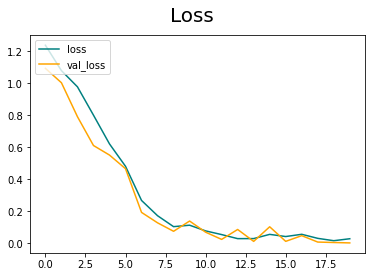

In [ ]:
## Loss 
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

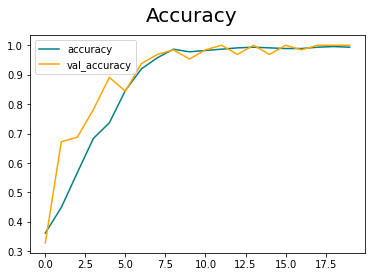

In [ ]:
## Accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
img = cv2.imread("/content/photo_me.jpeg")

In [ ]:
#

In [ ]:

## read the image 
img = cv2.resize(img, (256,256))

error: ignored

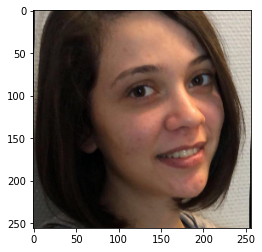

In [ ]:

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
img.shape

(256, 256, 3)

In [ ]:
img = img/256

In [ ]:
img = tf.expand_dims(img, 0) # Create a batch


In [ ]:

results = model.predict(img)

In [ ]:
results.argmax()

1

In [ ]:

print(results)

[[4.2896060e-04 9.9946910e-01 1.0198069e-04]]


In [ ]:
classes[results.argmax()]

'straight'

# 4. Evaluate Performance 

## 4.1 Evaluate  

In [ ]:
from tensorflow.keras.metrics import Precision, Recall
pre = Precision()
re = Recall()

In [ ]:
predictions = []
actual = []
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
   
    actual.extend(y)
    for i, element in enumerate(yhat):
        n = np.array(element)
        predictions.append(np.argmax(n))


   


In [ ]:
print(len(actual), len(predictions))

128 128


In [ ]:
from sklearn import metrics

print(metrics.classification_report(actual, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       0.97      0.97      0.97        39
           2       0.98      0.98      0.98        43

    accuracy                           0.98       128
   macro avg       0.98      0.98      0.98       128
weighted avg       0.98      0.98      0.98       128



In [ ]:
## confusion metric
cm = metrics.confusion_matrix(actual, predictions)


In [ ]:
cm

array([[46,  0,  0],
       [ 0, 38,  1],
       [ 0,  1, 42]])

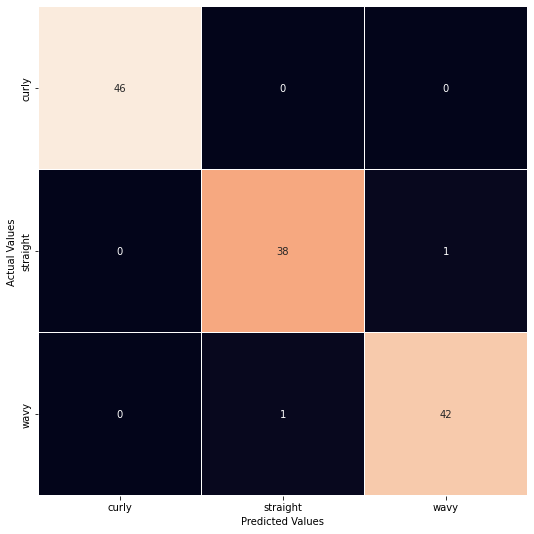

In [ ]:
## plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (9,9))
ax = sns.heatmap(cm, annot = True,  linewidth = 0.5, square = True, cbar = False)
## For the Tick Labels, the labels should be in Alphabetical order
ax.xaxis.set_ticklabels(['curly', 'straight', 'wavy'])
ax.yaxis.set_ticklabels(['curly', 'straight', 'wavy'])
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

plt.show()

# 1. why we use softmax as acitiivation function in multiclassification problems?
# 2. 
